The testing dataset would be loaded and used for validation on model performance.

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from numpy import mean
from numpy import std

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import joblib

Load testing dataset into notebook. Observe its shape.

In [37]:
occu = pd.read_csv('datatest.txt')
print(occu.shape)
occu.head(2)

(2665, 7)


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700,26.272,585.2,749.2,0.004764,1
141,2015-02-02 14:19:59,23.718,26.290,578.4,760.4,0.004773,1


Observe a general picture on the data of target and features

In [38]:
def snapshot(df):
    n_missing = pd.DataFrame(df.isnull().sum(), columns = ['n_missing'])
    pct_missing = pd.DataFrame(round(df.isnull().sum() / df.shape[0], 2), columns = ['pct_missing'])
    dtype = pd.DataFrame(df.dtypes, columns = ['dtype'])
    n_unique = []
    for col in df.columns:
        n_unique.append(df[col].nunique())    
    return pd.DataFrame(n_unique, index = df.columns, columns = ['n_unique']).join(dtype).join(n_missing).join(pct_missing)

snapshot = snapshot(occu)
snapshot

,n_unique,dtype,n_missing,pct_missing
date,2665,object,0,0.0
Temperature,335,float64,0,0.0
Humidity,725,float64,0,0.0
Light,428,float64,0,0.0
CO2,1894,float64,0,0.0
HumidityRatio,1506,float64,0,0.0
Occupancy,2,int64,0,0.0


In [39]:
occu['date'] = pd.to_datetime(occu['date'])

In [40]:
occu.set_index(keys = 'date', drop = True, inplace = True)
occu['Occupancy'] = occu['Occupancy'].astype(str)

Observe the distribution of target data in the testing dataset.

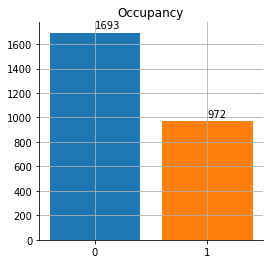

In [41]:
def plot_single_categorical(df, col):
    plt.figure(figsize = (4, 4))
    plt.bar(x = df[col].value_counts().index, height = df[col].value_counts(), color = mcolors.TABLEAU_COLORS)
    sns.despine(top = True)
    n_level = df[col].nunique()
    for x_coor in range(n_level):
        plt.annotate(df[col].value_counts().iloc[x_coor], 
                     xy = (x_coor, 
                           df[col].value_counts().iloc[x_coor] + df[col].value_counts().iloc[0]/50))
    plt.xticks(rotation = 0)
    plt.grid()
    plt.title(col)
    plt.show()
    
plot_single_categorical(occu, 'Occupancy')

The bar graph above shows that the target of testing dataset is unbalanced with more samples with label '0' than samples with label '1'.

In [42]:
X = occu.drop('Occupancy', axis = 1)
y = occu['Occupancy'].astype(int)

Load the model stored in 'joblib' file into this notebook.

In [43]:
logi = joblib.load('logi.joblib')

Since the model was trained with the feature 'Light' alone, only that feature would be used to predict targets in the testing datset.

In [44]:
X[['Light']]

,Light
date,
2015-02-02 14:19:00,585.200000
2015-02-02 14:19:59,578.400000
2015-02-02 14:21:00,572.666667
2015-02-02 14:22:00,493.750000
2015-02-02 14:23:00,488.600000
...,...
2015-02-04 10:38:59,808.000000
2015-02-04 10:40:00,809.800000
2015-02-04 10:40:59,817.000000


In [45]:
y_pred_logi = logi.predict(X[['Light']])

In [46]:
print(classification_report(y, y_pred_logi))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



The classification report shows that the model achieved a satisfactory result for both labels in terms of both metrics which are precision and recall.